In [30]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [31]:
df_air_quality = pd.read_csv("air_quality.csv")

In [32]:
df_air_quality['fecha'] = pd.to_datetime(df_air_quality['fecha'])


In [33]:
#creo mi funcion base (es la que conozco, es mi modelo conocido)​

def func(x, y):

 return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

#creo una malla de 100 x 200​

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]


points = np.random.rand(100, 2)

#de estos puntos que serian los sensores, y sus lecturas, voy a interpolar en​

#la malla los valores que deseo calcular para mi modelo de deduccion real​

values = func(points[:,0], points[:,1])

# ejecuto las interpolaciones, uso tres metodos para comparar su desempeno​

from scipy.interpolate import griddata

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

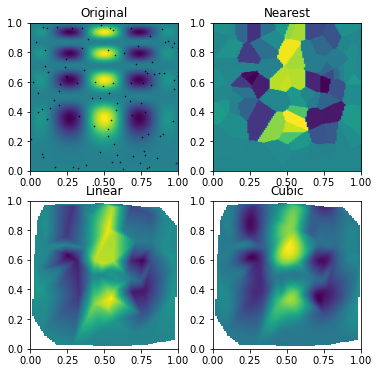

In [34]:
#grafico los resultados de los tres ejemplos de inteprolacion​

import matplotlib.pyplot as plt

plt.subplot(221)

plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')

plt.plot(points[:,0], points[:,1], 'k.', ms=1)

plt.title('Original')

plt.subplot(222)

plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')

plt.title('Nearest')

plt.subplot(223)

plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()

In [35]:
def obtener_registros_por_dia(dataframe, dia):
    dia = pd.to_datetime(dia).date()
    registros_dia = dataframe[dataframe['fecha'].dt.date == dia]
    return registros_dia

def obtener_registros_por_hora(dataframe, fecha_hora):
    fecha_hora = pd.to_datetime(fecha_hora)
    registros_hora = dataframe[dataframe['fecha'] == fecha_hora]
    return registros_hora

In [36]:
dataframe_prueba = obtener_registros_por_hora(df_air_quality, "2019-02-21 04:00:0")

In [37]:
dataframe_prueba

,Unnamed: 0,index,latitud,nombre,longitud,fecha,valor
0,0,0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 04:00:00,34.0000
8593,8761,1,6.252561,Estación Tráfico Centro,-75.569580,2019-02-21 04:00:00,28.0000
17196,17522,2,6.263370,"Medellín, centro occidente - Universidad Naci...",-75.577004,2019-02-21 04:00:00,19.0000
25703,26283,3,6.185667,Itagüí - Casa de Justicia Itagüí,-75.597206,2019-02-21 04:00:00,33.0000
34381,35044,4,6.099081,Caldas - Corporacion Universitaria Lasallista,-75.638626,2019-02-21 04:00:00,46.0000
43013,43805,5,6.168497,Itagüí - I.E. Concejo Municipal de Itagüí,-75.644356,2019-02-21 04:00:00,17.0000
51647,52566,6,6.182542,"Medellín, El Poblado - Tanques La Ye EPM",-75.550636,2019-02-21 04:00:00,23.0000
60268,61327,7,6.152313,Estación Tráfico Sur,-75.627487,2019-02-21 04:00:00,38.0000
68757,70088,8,6.093078,Caldas - E U Joaquín Aristizabal,-75.637764,2019-02-21 04:00:00,49.6127
77446,78849,9,6.155531,La Estrella - Hospital,-75.644173,2019-02-21 04:00:00,21.0000


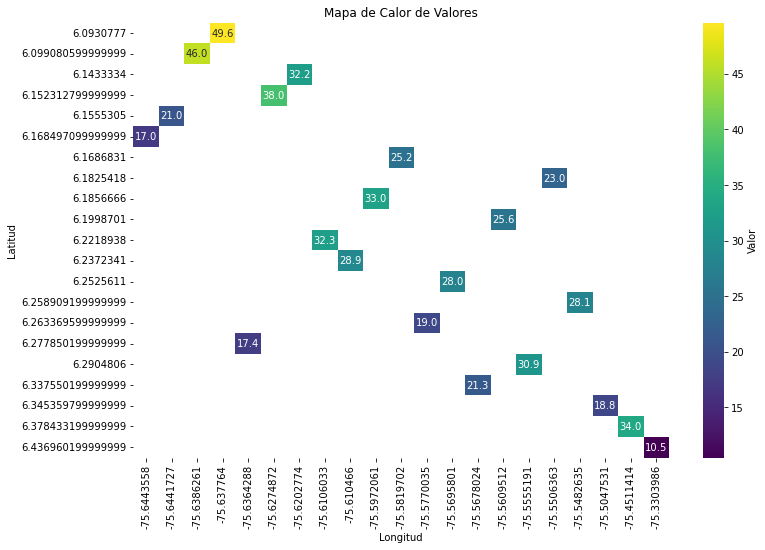

In [38]:
import seaborn as sns
plt.figure(figsize=(12, 8))

# Crear un mapa de calor
sns.heatmap(data=dataframe_prueba.pivot_table(index='latitud', columns='longitud', values='valor', aggfunc='mean'),
            cmap='viridis',  # Puedes cambiar el mapa de colores a tu preferencia
            annot=True, fmt=".1f", cbar_kws={'label': 'Valor'})  # Mostrar valores y formato de anotación

# Configurar etiquetas de ejes y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor de Valores')

# Mostrar el mapa de calor
plt.show()


In [56]:
def aqi(df):
    l_aqi = []
    #completar denominaciones
    concentraciones=df["valor"]
    l_quality = []
    for concentracion in concentraciones:
        if(concentracion<12):
            quality = "Good"
            conc_lo=0.0
            conc_hi=12.0
            aqi_lo=0.0
            aqi_hi=50
        elif(concentracion>12 and concentracion<=35.4):
            quality = "Moderate"
            conc_lo=12.1
            conc_hi=35.4
            aqi_lo=51
            aqi_hi=100
        elif(concentracion>35.4 and concentracion<=55.5):
            quality = "Unhealthy-SensitiveGroups"
            conc_lo=35.5
            conc_hi=55.4
            aqi_lo=101
            aqi_hi=150
        elif(concentracion>55.4 and concentracion<=150.4):
            quality = "Unhealthy"
            conc_lo=55.5
            conc_hi=150.4
            aqi_lo=151
            aqi_hi=200
        elif(concentracion>150.4 and concentracion<=250.4):
            quality = "Very Unhealthy"
            conc_lo=150.5
            conc_hi=250.4
            aqi_lo=201
            aqi_hi=300
        if(concentracion>250.4):
            quality = "Hazardous"
            conc_lo=250.5
            conc_hi=500.4
            aqi_lo=301
            aqi_hi=500
        aqi_equation = ((aqi_hi-aqi_lo)/(conc_hi-conc_lo)*(concentracion-conc_lo))+(aqi_lo)
        l_aqi.append(aqi_equation)
        l_quality.append(quality)
    df_aqi= pd.DataFrame({"aqi":l_aqi,"quality":l_quality})
    df_final = pd.concat([df.reset_index(),df_aqi],axis=1)
    df_final = df_final.drop(df_final.columns[[0, 1, 2]], axis=1)
    return df_final
    

In [57]:
df_prueba_aqi= aqi(df_air_quality)

In [58]:
df_prueba_aqi

,latitud,nombre,longitud,fecha,valor,aqi,quality
0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 04:00:00,34.0000,97.055794,Moderate
1,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 05:00:00,29.0000,86.540773,Moderate
2,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 06:00:00,36.0000,102.231156,Unhealthy-SensitiveGroups
3,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 07:00:00,34.0000,97.055794,Moderate
4,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 08:00:00,41.0000,114.542714,Unhealthy-SensitiveGroups
...,...,...,...,...,...,...,...
180705,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 00:00:00,26.2325,80.720708,Moderate
180706,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 01:00:00,30.9189,90.576227,Moderate
180707,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 02:00:00,24.9201,77.960725,Moderate
180708,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 03:00:00,20.1408,67.909837,Moderate


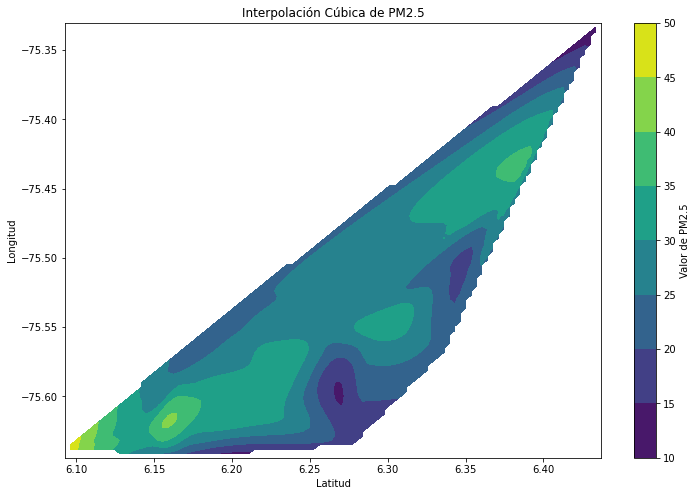

In [62]:
from scipy.interpolate import griddata

latitudes1 = dataframe_prueba['latitud']
longitudes1 = dataframe_prueba['longitud']
valores = dataframe_prueba['valor']

# Crear un grid de coordenadas de latitud y longitud
latitud_grid = np.linspace(latitudes1.min(), latitudes1.max(), 100)  # Ajusta la resolución según tus necesidades
longitud_grid = np.linspace(longitudes1.min(), longitudes1.max(), 100)  # Ajusta la resolución según tus necesidades
latitud_mesh, longitud_mesh = np.meshgrid(latitud_grid, longitud_grid)

# Realizar la interpolación cúbica de los valores de PM2.5 en el grid
grid_interpolado = griddata((latitudes1, longitudes1), valores, (latitud_mesh, longitud_mesh), method='cubic')

# Crear un gráfico de contorno de la interpolación
plt.figure(figsize=(12, 8))
plt.contourf(latitud_mesh, longitud_mesh, grid_interpolado, cmap='viridis')  # Puedes cambiar el mapa de colores
plt.colorbar(label='Valor de PM2.5')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Interpolación Cúbica de PM2.5')

# Mostrar el gráfico
plt.show()


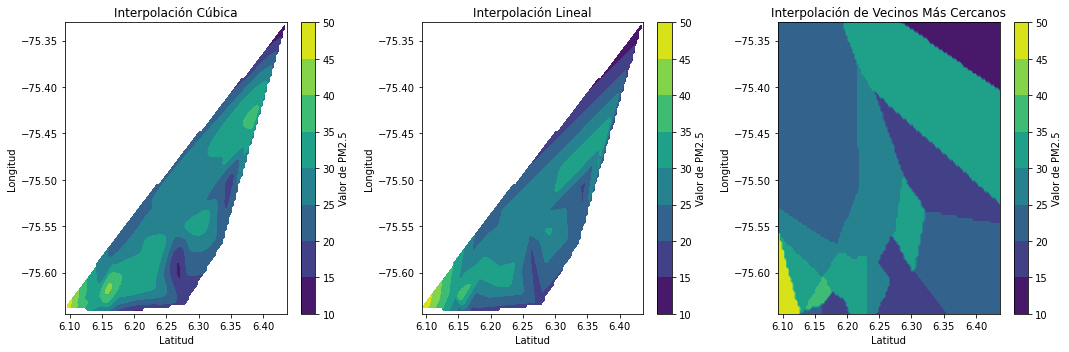

In [63]:
# Definir las coordenadas de latitud y longitud en el DataFrame
latitudes = dataframe_prueba['latitud']
longitudes = dataframe_prueba['longitud']
valores = dataframe_prueba['valor']

# Crear un grid de coordenadas de latitud y longitud
latitud_grid = np.linspace(latitudes.min(), latitudes.max(), 100)  # Ajusta la resolución según tus necesidades
longitud_grid = np.linspace(longitudes.min(), longitudes.max(), 100)  # Ajusta la resolución según tus necesidades
latitud_mesh, longitud_mesh = np.meshgrid(latitud_grid, longitud_grid)

# Realizar interpolación cúbica de los valores de PM2.5 en el grid
grid_interpolado_cubico = griddata((latitudes, longitudes), valores, (latitud_mesh, longitud_mesh), method='cubic')

# Realizar interpolación lineal de los valores de PM2.5 en el grid
grid_interpolado_lineal = griddata((latitudes, longitudes), valores, (latitud_mesh, longitud_mesh), method='linear')

# Realizar interpolación de vecinos más cercanos de los valores de PM2.5 en el grid
grid_interpolado_vecinos = griddata((latitudes, longitudes), valores, (latitud_mesh, longitud_mesh), method='nearest')

# Crear subplots para mostrar las tres interpolaciones juntas
plt.figure(figsize=(15, 5))

# Subplot para interpolación cúbica
plt.subplot(131)
plt.contourf(latitud_mesh, longitud_mesh, grid_interpolado_cubico, cmap='viridis')
plt.colorbar(label='Valor de PM2.5')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Interpolación Cúbica')

# Subplot para interpolación lineal
plt.subplot(132)
plt.contourf(latitud_mesh, longitud_mesh, grid_interpolado_lineal, cmap='viridis')
plt.colorbar(label='Valor de PM2.5')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Interpolación Lineal')

# Subplot para interpolación de vecinos más cercanos
plt.subplot(133)
plt.contourf(latitud_mesh, longitud_mesh, grid_interpolado_vecinos, cmap='viridis')
plt.colorbar(label='Valor de PM2.5')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Interpolación de Vecinos Más Cercanos')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


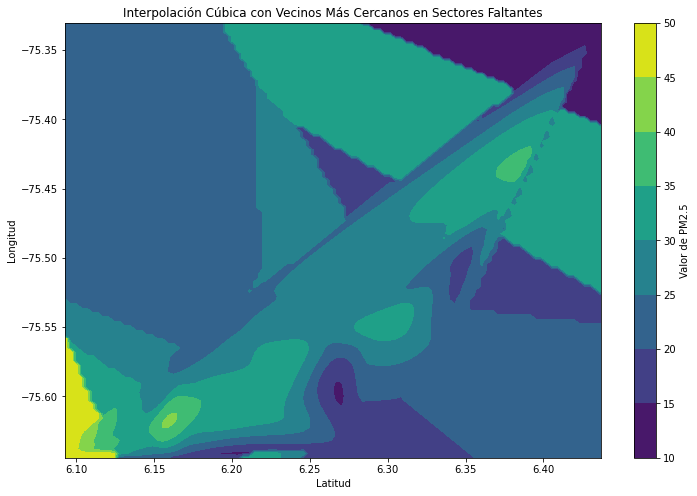

In [64]:
# Definir las coordenadas de latitud y longitud en el DataFrame
latitudes = dataframe_prueba['latitud']
longitudes = dataframe_prueba['longitud']
valores = dataframe_prueba['valor']
valores_aqi=aqi(valores)

# Crear un grid de coordenadas de latitud y longitud
latitud_grid = np.linspace(latitudes.min(), latitudes.max(), 100)  # Ajusta la resolución según tus necesidades
longitud_grid = np.linspace(longitudes.min(), longitudes.max(), 100)  # Ajusta la resolución según tus necesidades
latitud_mesh, longitud_mesh = np.meshgrid(latitud_grid, longitud_grid)

# Realizar interpolación cúbica de los valores de PM2.5 en el grid
grid_interpolado_cubico = griddata((latitudes, longitudes), valores, (latitud_mesh, longitud_mesh), method='cubic')

# Encontrar los puntos en los que la interpolación cúbica no tiene valores
puntos_faltantes = np.isnan(grid_interpolado_cubico)

# Realizar interpolación de vecinos más cercanos en los puntos faltantes
grid_interpolado_vecinos = griddata((latitudes, longitudes), valores, (latitud_mesh, longitud_mesh), method='nearest')

# Combinar las interpolaciones: usar la cúbica donde esté disponible y los vecinos más cercanos donde falte
grid_interpolado_combinado = np.where(puntos_faltantes, grid_interpolado_vecinos, grid_interpolado_cubico)

# Crear un gráfico de contorno del resultado combinado
plt.figure(figsize=(12, 8))
plt.contourf(latitud_mesh, longitud_mesh, grid_interpolado_combinado, cmap='viridis')  # Puedes cambiar el mapa de colores
plt.colorbar(label='Valor de PM2.5')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Interpolación Cúbica con Vecinos Más Cercanos en Sectores Faltantes')

# Mostrar el gráfico
plt.show()
